# Sujet 8 : Quelles informations les données nous apportent-elles sur le suivi de l’activité touristique ?

Le but de ce sujet est de construire un tableau de bord de suivi de l'activité touristique. Celui-ci pourra éventuellement se focaliser sur une zone ou une ville en particulier.

Il s'agit dans un premier temps de calculer différents indicateurs ayant une dimension temporelle, puis dans un second temps de les intégrer dans un tableau de bord.

Ce notebook vise à vous permettre de démarrer sur ce sujet avec le chargement des données et la création d'un premier indicateur. Des idées et des ressources externes sont également proposées pour vous permettre d'aller plus loin.

## Pour débuter

On commence par importer les packages nécessaires et charger les données. On utilise la librairie _pandas_ qui permet de manipuler les données sous forme de DataFrames.

In [1]:
import urllib.request
import os
import s3fs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Une première idée serait de calculer un indicateur du volume des réservations. Cette information n'étant pas disponible dans les données, il faut utiliser un proxy. Ici, il s'agira du nombre de commentaires laissés par les clients. Les annonces de logements recevraient en moyenne un commentaire pour deux réservations.

On charge les données du fichier _reviews_ pour les trois villes disponibles dans trois dataframes différents. On leur ajoute une colonne 'city' pour reprérer la ville puis on les concatène pour travailler sur un unique dataframe.

In [2]:
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'})

fs.get('ssplab/funathon/data/paris/2021-04-10/reviews.csv.gz', 'reviews.csv.gz')
reviews_paris = pd.read_csv('reviews.csv.gz',compression='gzip')
reviews_paris['city'] = 'Paris'

fs.get('ssplab/funathon/data/lyon/2021-04-18/reviews.csv.gz', 'reviews.csv.gz')
reviews_lyon = pd.read_csv('reviews.csv.gz',compression='gzip')
reviews_lyon['city'] = 'Lyon'

fs.get('ssplab/funathon/data/bordeaux/2021-04-18/reviews.csv.gz', 'reviews.csv.gz')
reviews_bordeaux = pd.read_csv('reviews.csv.gz',compression='gzip')
reviews_bordeaux['city'] = 'Bordeaux'

In [3]:
reviews = pd.concat([reviews_paris, reviews_lyon, reviews_bordeaux])
reviews.head(3)

listing_id         id        date  reviewer_id reviewer_name  \
0        2577  366217274  2019-01-02     28047930          Kate   
1        3109  123127969  2016-12-27     12389804        Sophie   
2        3109  123274144  2016-12-28     67553494         Tom'S   

                                            comments   city  
0  Beautiful apartment in a really handy location...  Paris  
1  The host canceled this reservation the day bef...  Paris  
2  The host canceled this reservation 2 days befo...  Paris

On prépare ensuite au calcul de l'indicateur en comptant pour chaque annonce le nombre de commentaires qui ont été laissés par mois.

In [4]:
reviews['commentaire'] = 1
reviews['Date'] = pd.to_datetime(reviews.date)
reviews['month']  = reviews.Date.dt.to_period("M")
month_review = reviews.groupby(['month', 'city'], as_index=False)['commentaire'].count()

On peut représenter graphiquement cet indicateur grâce la méthode _plot_ des dataframes pandas.

(564, 615)

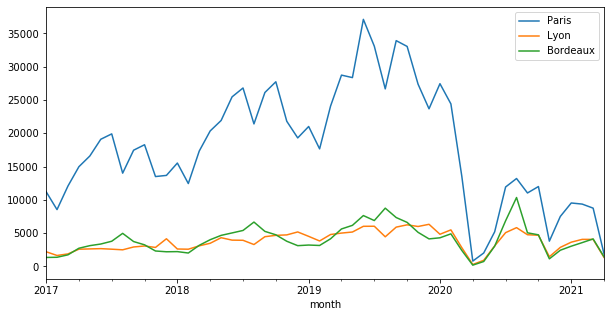

In [5]:
ax = month_review[month_review.city=='Paris'].plot.line(x='month', y='commentaire', label='Paris', figsize=(10,5))
month_review[month_review.city=='Lyon'].plot.line(x='month', y='commentaire', label='Lyon', ax=ax)
month_review[month_review.city=='Bordeaux'].plot.line(x='month', y='commentaire', label='Bordeaux', ax=ax)
ax.set_xlim(('2017-01','2021-04'))

### Comment poursuivre ?

- Calculer d'autres indicateurs
- Eventuellement les comparer à des sources externes
- Créer un tableau de bord pour intégrer les indicateurs
- Ajouter de l'interactivité dans le tableau de bord (choix d'une ville ou d'une période donnée par exemple)

### Ressources externes

[Documentation de Streamlit](https://docs.streamlit.io/en/stable/index.html)

Streamlit est un outil de création de tableaux de bord interactifs en Python.